### 03.Decision Tree

Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

Loading Data and modules

    import numpy as np
    import pandas as pd
    import seaborn as sb
    import matplotlib.pyplot as plt
    import sklearn
    from pandas import Series, DataFrame
    from pylab import rcParams
    from sklearn import preprocessing
    from sklearn.linear_model import LogisticRegression
    from sklearn.cross_validation import train_test_split
    from sklearn import metrics
    from sklearn.metrics import classification_report

Url = https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv

titanic = pd.read_csv(url)

titanic.columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.

In [68]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [57]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Note**

titanic.columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [58]:
df = titanic.copy()

In [59]:
df = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [13]:
df.shape

(891, 7)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [19]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [28]:
df.loc[df['Pclass'] == 1, 'Age'].mean()

38.233440860215055

In [61]:
def condition_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [62]:
import time
start_time = time.time()
df['Age'] = titanic[['Age','Pclass']].apply(condition_age,axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


In [44]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [56]:
import time
start_time = time.time()
m = df.Age.isnull()
conds = [m & df.Pclass.eq(1),
         m & df.Pclass.eq(2),
         m]
choices = [37, 29, 24]

df['Age'] = np.select(conds, choices, default=df.Age)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.002996206283569336 seconds ---


In [63]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [65]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

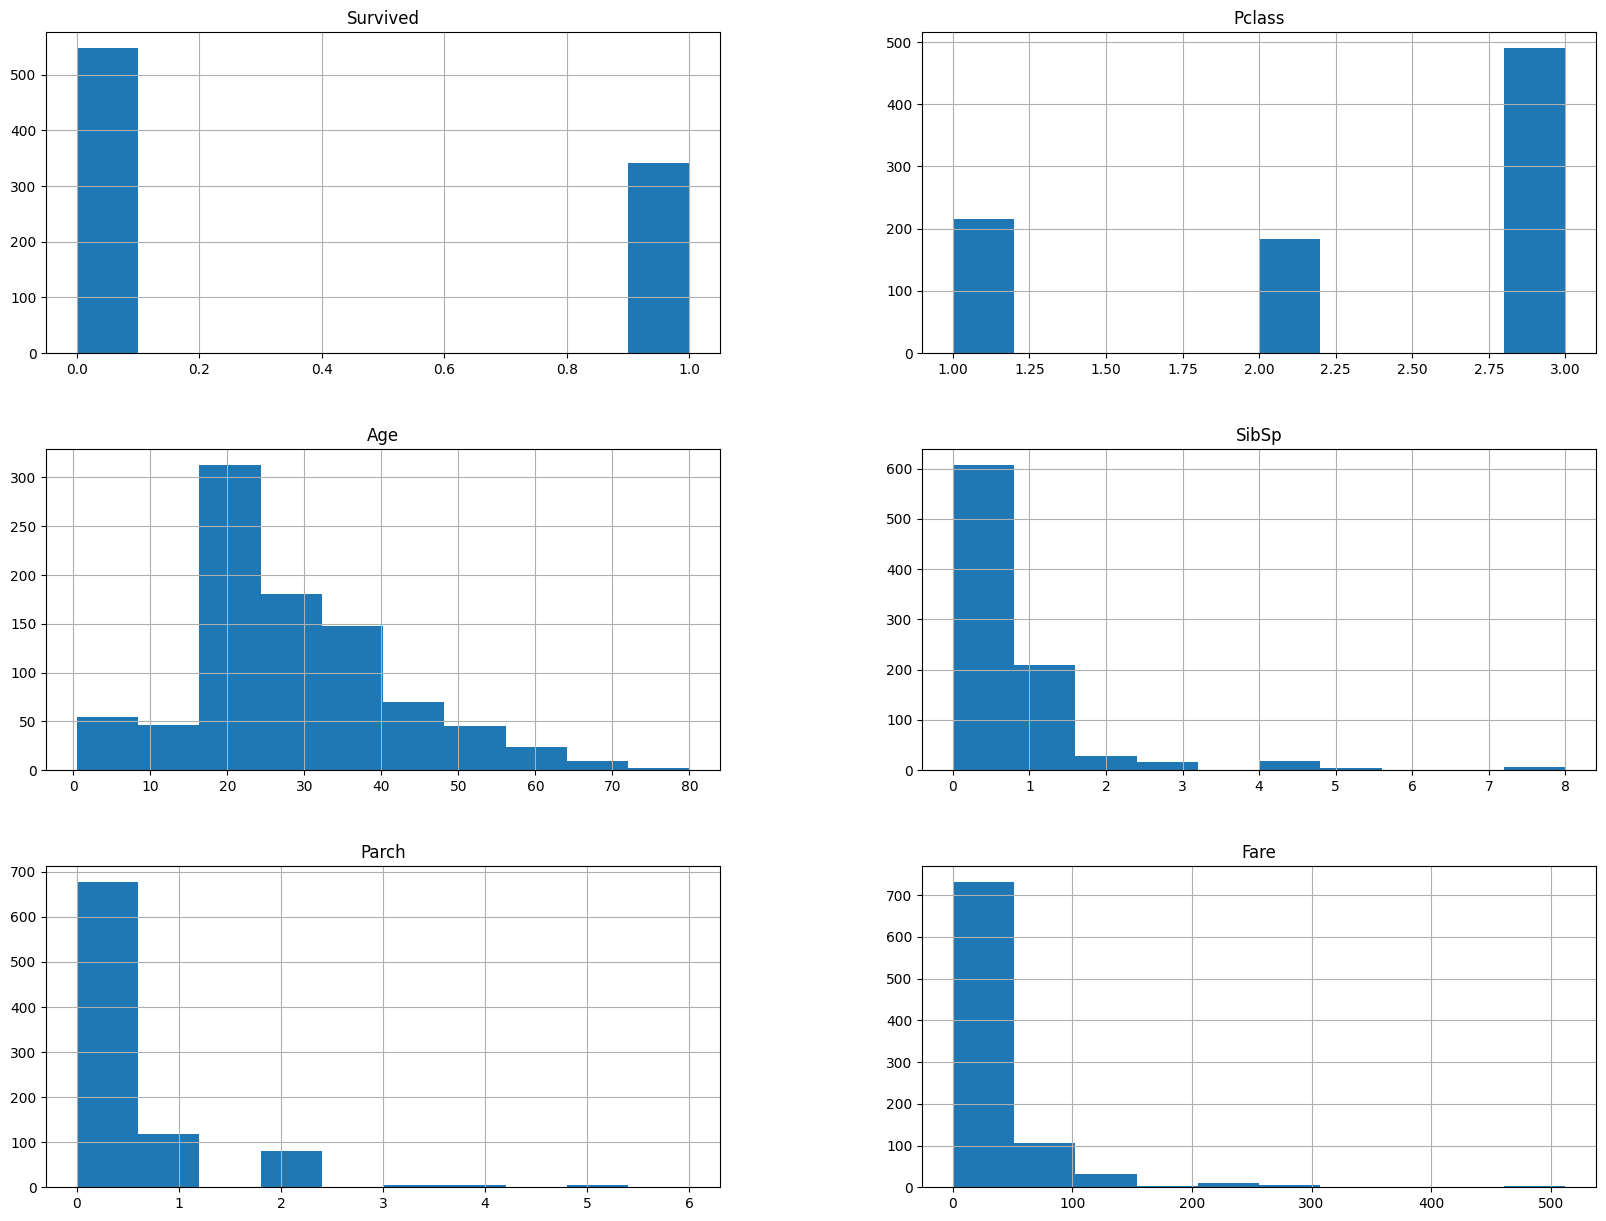

In [95]:
df.hist(figsize=(20,15))

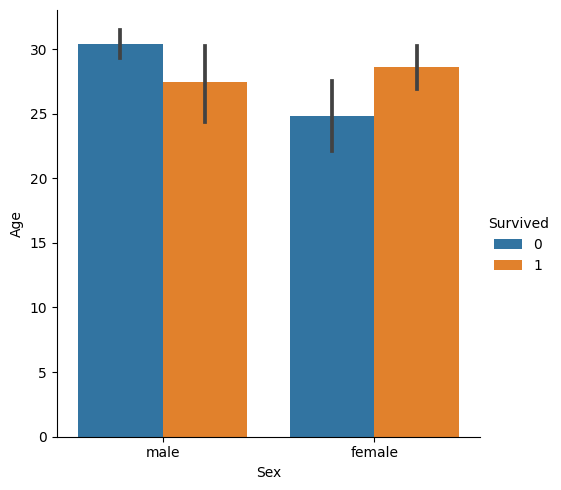

In [77]:
sb.catplot(x='Sex',y='Age',data=df,kind='bar',height=5,hue='Survived')

In [79]:
df.groupby('Survived')['Sex'].count()

Survived
0    549
1    342
Name: Sex, dtype: int64

In [80]:
df.groupby(['Survived','Sex']).count()

Pclass  Age  SibSp  Parch  Fare
Survived Sex                                    
0        female      81   81     81     81    81
         male       468  468    468    468   468
1        female     233  233    233    233   233
         male       109  109    109    109   109

<AxesSubplot:xlabel='Survived'>

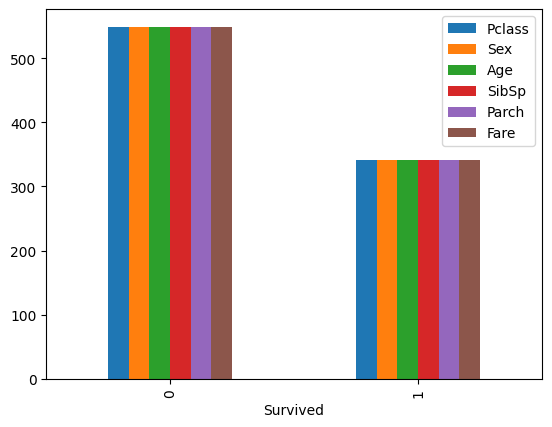

In [83]:
df.groupby(['Survived']).count().plot(kind='bar')

<AxesSubplot:xlabel='Survived', ylabel='count'>

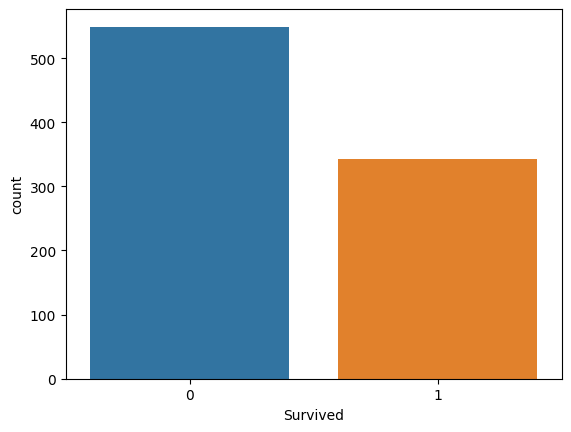

In [85]:
sb.countplot(df['Survived'])

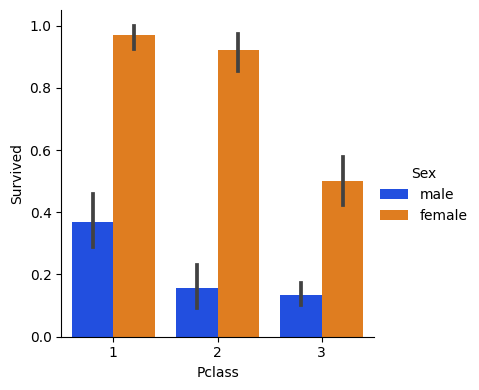

In [88]:
sb.catplot(x='Pclass',y='Survived',data=df,kind='bar',height=4,palette='bright',hue='Sex')

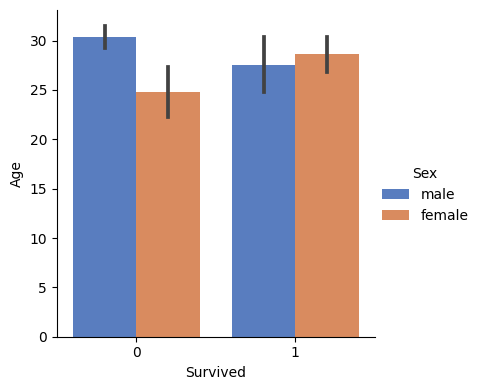

In [91]:
sb.catplot(x='Survived',y='Age',data=df,kind='bar',height=4,palette='muted',hue='Sex')

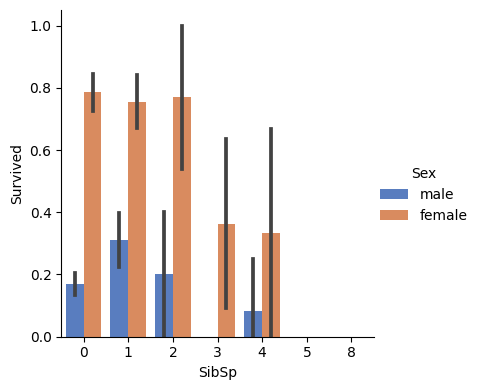

In [93]:
sb.catplot(x='SibSp',y='Survived',data=df,kind='bar',palette='muted',height=4,hue='Sex')

In [96]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((623, 6), (268, 6), (623,), (268,))

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [102]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [100]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [109]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [112]:
sex_categories = ['male', 'female']

In [115]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('labelencoder',OrdinalEncoder(categories=[sex_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [116]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [118]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.8208955223880597

In [119]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.753731343283582

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [121]:
y_pred = dtc.predict(X_test)

In [122]:
Accuracy_score = accuracy_score(y_test,y_pred)
Accuracy_score

0.753731343283582

In [123]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[131,  26],
       [ 40,  71]], dtype=int64)

In [124]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [126]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [127]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [128]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 5, 'min_samples_split': 8, 'splitter': 'random'}


0.8314838709677421

In [129]:
dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =4, min_samples_leaf= 6,min_samples_split=7, splitter ='random')
dtc2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=7, splitter='random')

In [130]:
dtc2.score(X_test,y_test)

0.8059701492537313